# <center> <u>MLR</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
tc = pd.read_csv("tc.csv")

In [3]:
tc.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
tc.shape

(1436, 38)

In [6]:
tc_df = tc.loc[:, ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [7]:
tc_df.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Building a Correlation matrix: 

In [8]:
tc_df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Building a Pair Plot graph for checking the dependencies between each feature variables

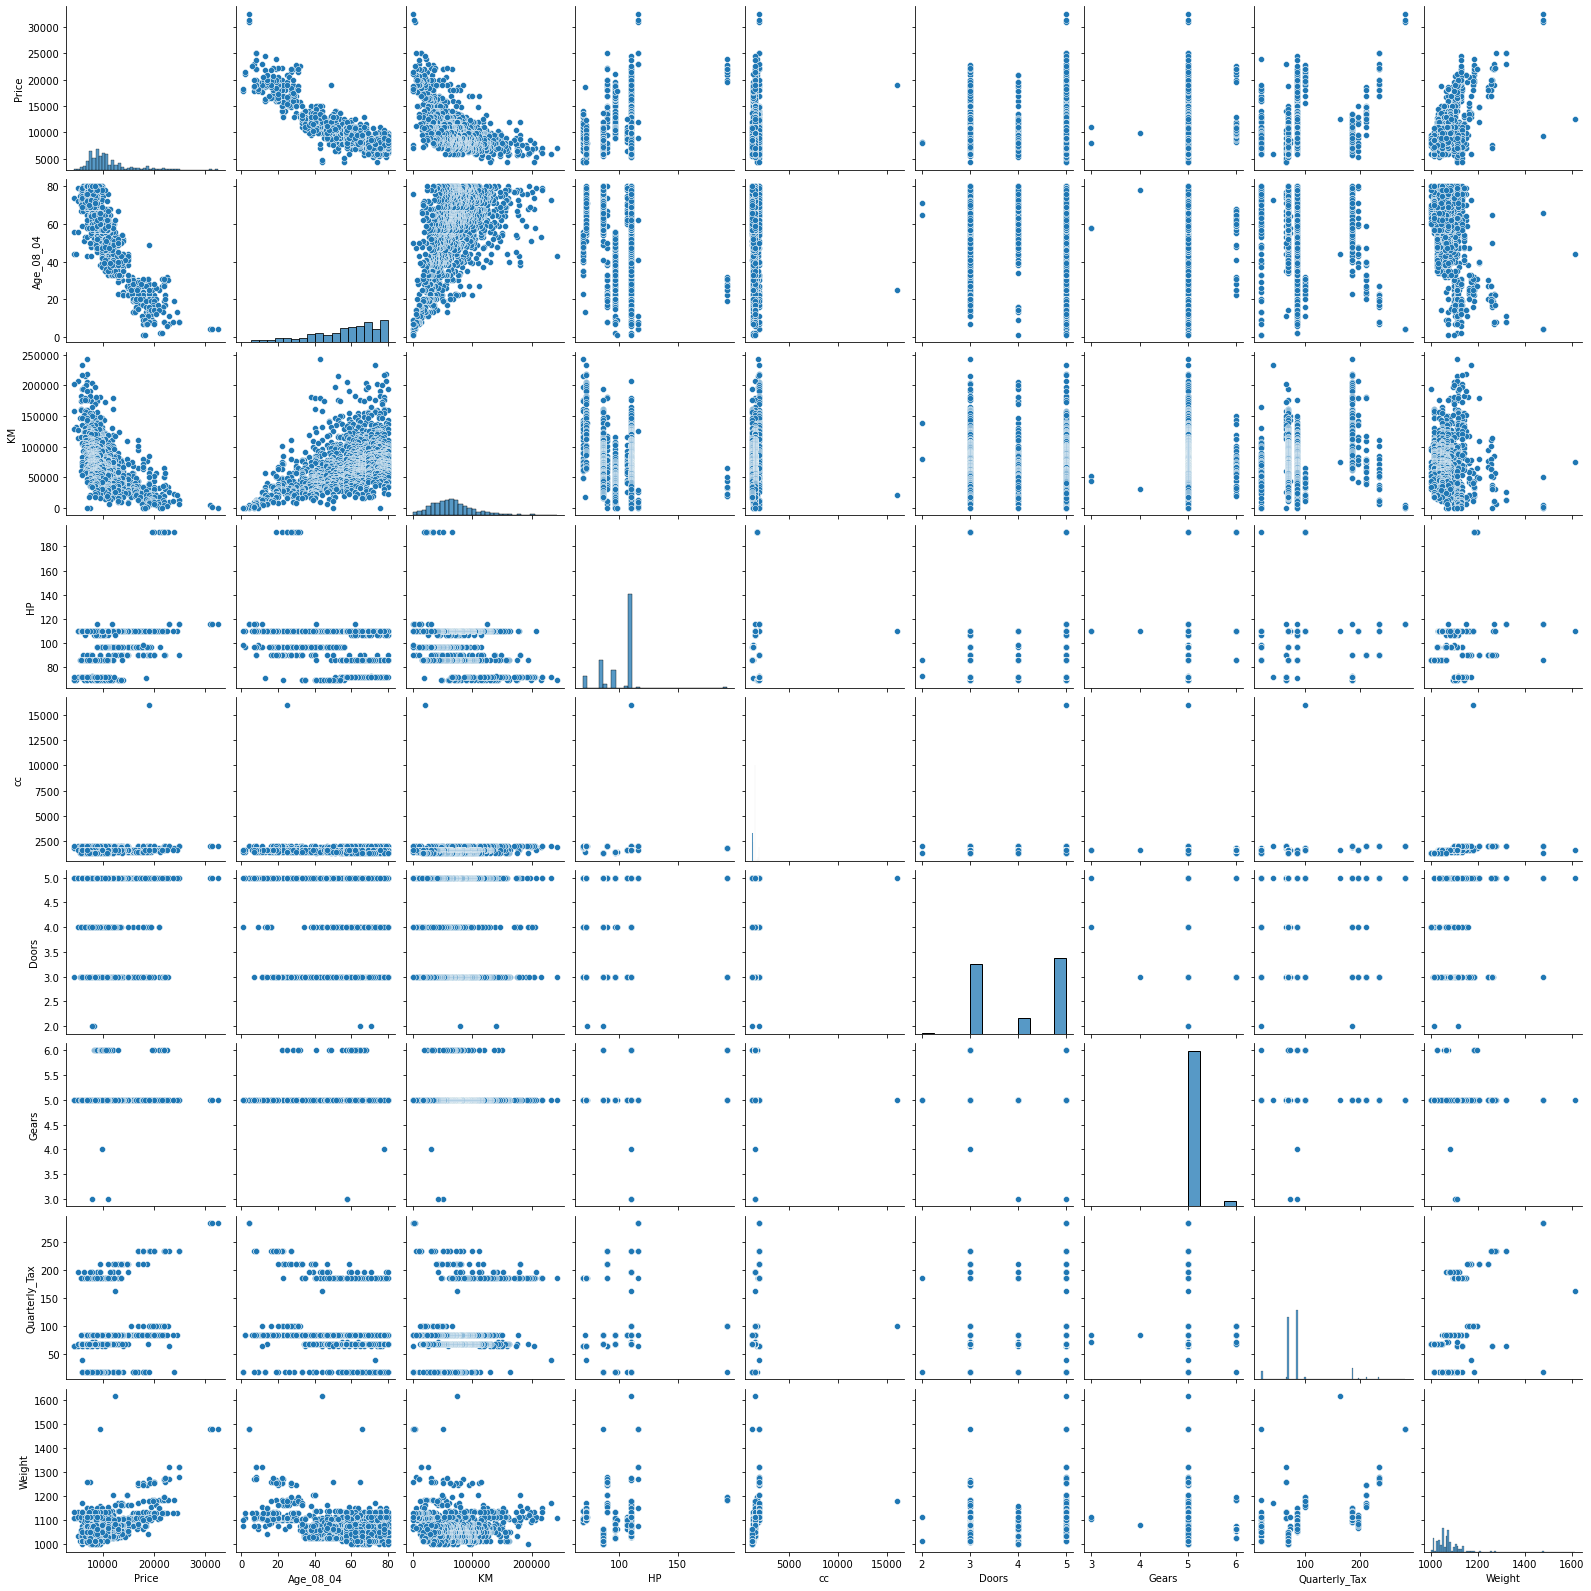

In [9]:
sns.pairplot(tc_df)

### List of the assumptions:
1. The features should be independent of each others
2. Errors and features are independent of each other
3. Q-Q plotting
4. Homoscedasticity: Variance of errors should be constant
5. Linearity: Y is having linear relation with all features

#### Checking for Null Values

In [11]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### Preparing a model:

In [13]:
tc_df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [30]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:18:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
round((model.pvalues),3)

Intercept        0.000
Age_08_04        0.000
KM               0.000
HP               0.000
cc               0.179
Doors            0.968
Gears            0.003
Quarterly_Tax    0.003
Weight           0.000
dtype: float64

- The highest Pvalue we get is 0.269 of cc and 0.968 for Doors

### Pvalue of cc is 0.269; building the model without cc (since it's not making much diff for the price prediction)

In [32]:
model_without_cc = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data = tc_df).fit()
model_without_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:19:05   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age_08_04      -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Pvalue of Doors is 0.969; building the model without Doors (since it's not making much diff for the price prediction)

In [33]:
model_without_doors = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight+Quarterly_Tax',data = tc_df).fit()
model_without_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:19:39   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Building the model without Doors and cc (since it's not making much diff for the price prediction)

In [35]:
model_without_doorcc = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax',data = tc_df).fit()
model_without_doorcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:20:39   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Accuracy much Improved

## Errors(Residual) to check Distribution of Errors:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
model_without_doorcc.resid

0      -3322.422572
1      -2529.055703
2      -2861.171645
3      -1486.091673
4      -2481.830556
           ...     
1431   -1284.117470
1432    2560.904652
1433      52.663431
1434   -1321.130247
1435   -3465.875034
Length: 1436, dtype: float64

In [19]:
# test of normality of residuals:
import statsmodels.api as sm

C:\Users\Anjali Chawda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Anjali Chawda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## QQ plotting: (to check if they reside in Normal Distribution)

C:\Users\Anjali Chawda\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


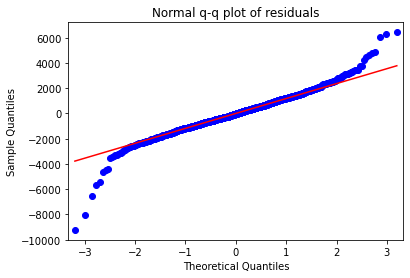

In [37]:
qqplot = sm.qqplot(model_without_doorcc.resid, line= 'q')
plt.title("Normal q-q plot of residuals")
plt.show()

In [22]:
# residual plot for homosecadisticity:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

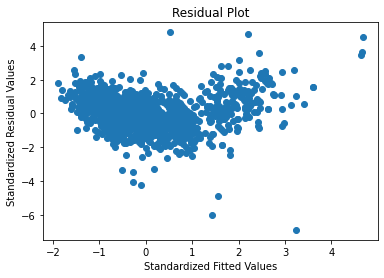

In [38]:
plt.scatter(get_standardized_values(model_without_doorcc.fittedvalues), get_standardized_values(model_without_doorcc.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values') # y_hat
plt.ylabel('Standardized Residual Values') # error
plt.show()

### Plot regression results against each regressor.

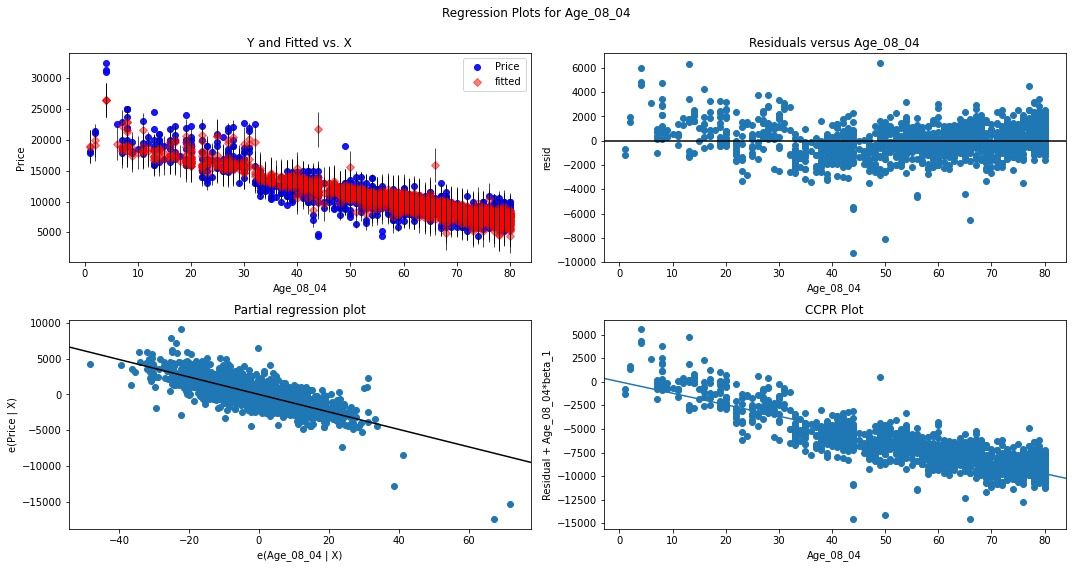

In [39]:
# residuals vs. regressors
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'Age_08_04', fig=fig)
plt.show()

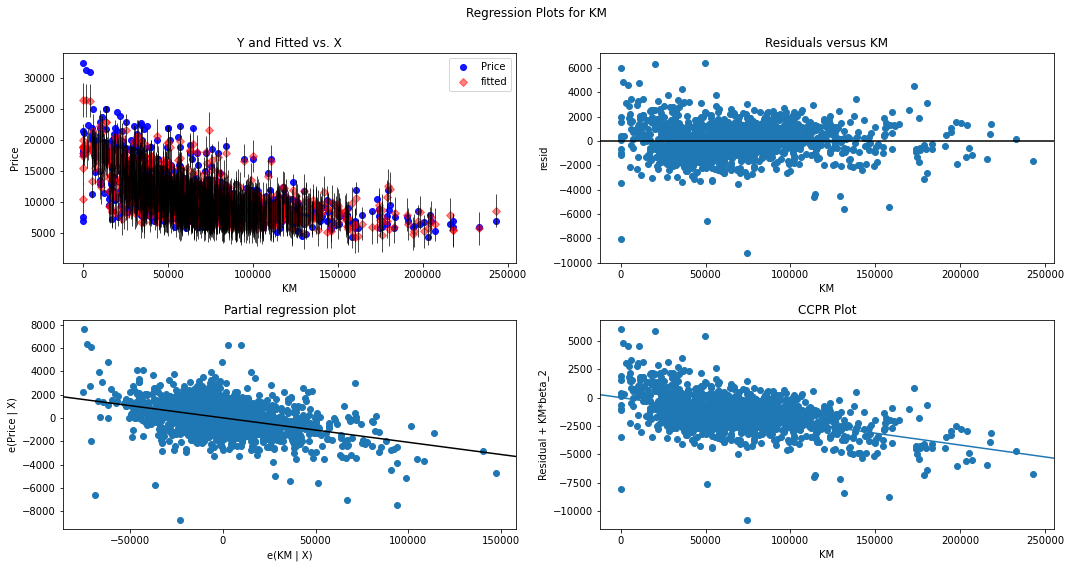

In [40]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'KM', fig=fig)
plt.show()

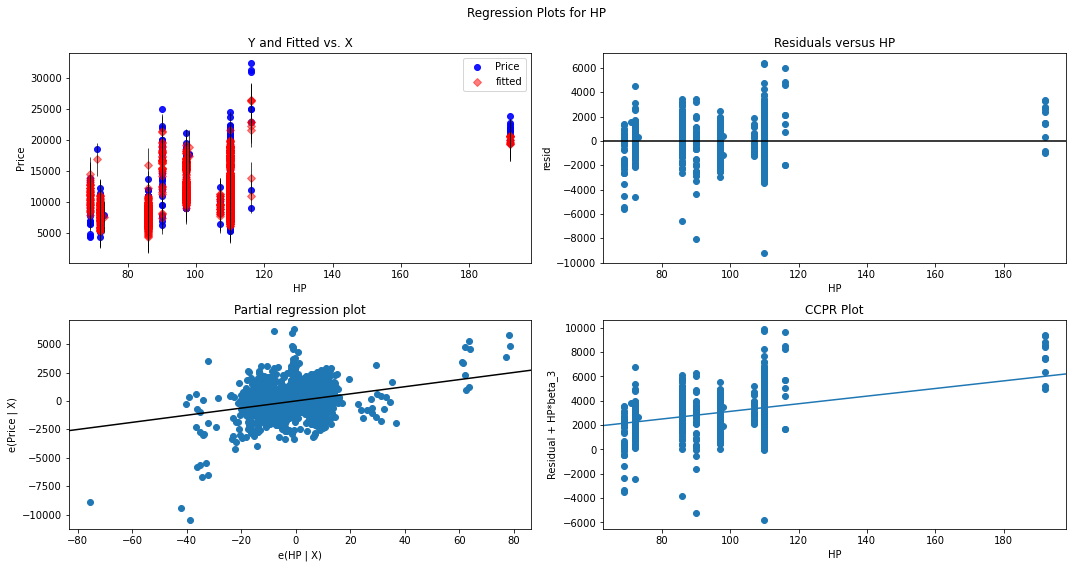

In [41]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'HP', fig=fig)
plt.show()

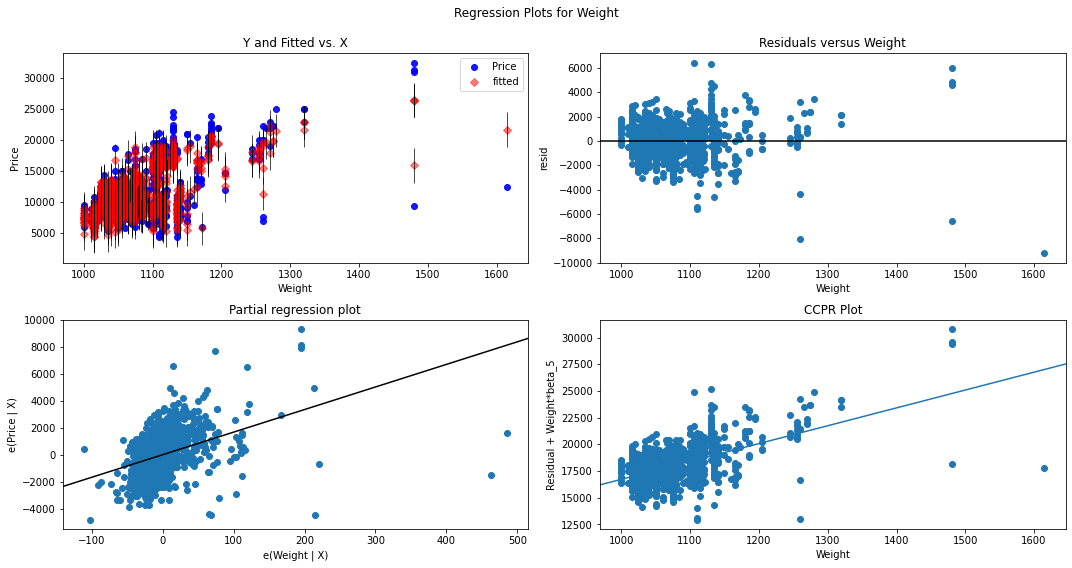

In [43]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'Weight', fig=fig)
plt.show()

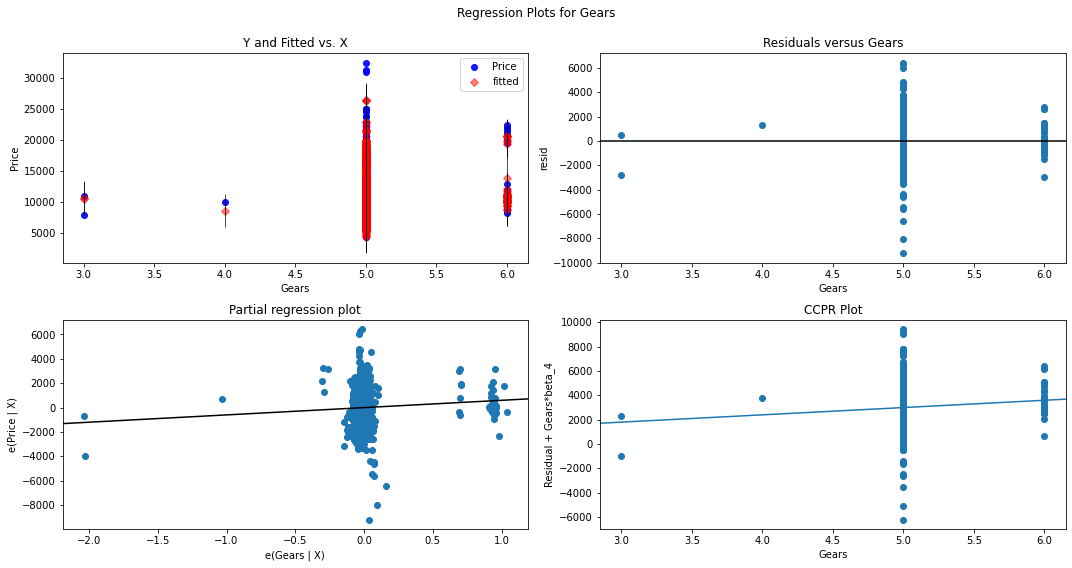

In [44]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'Gears', fig=fig)
plt.show()

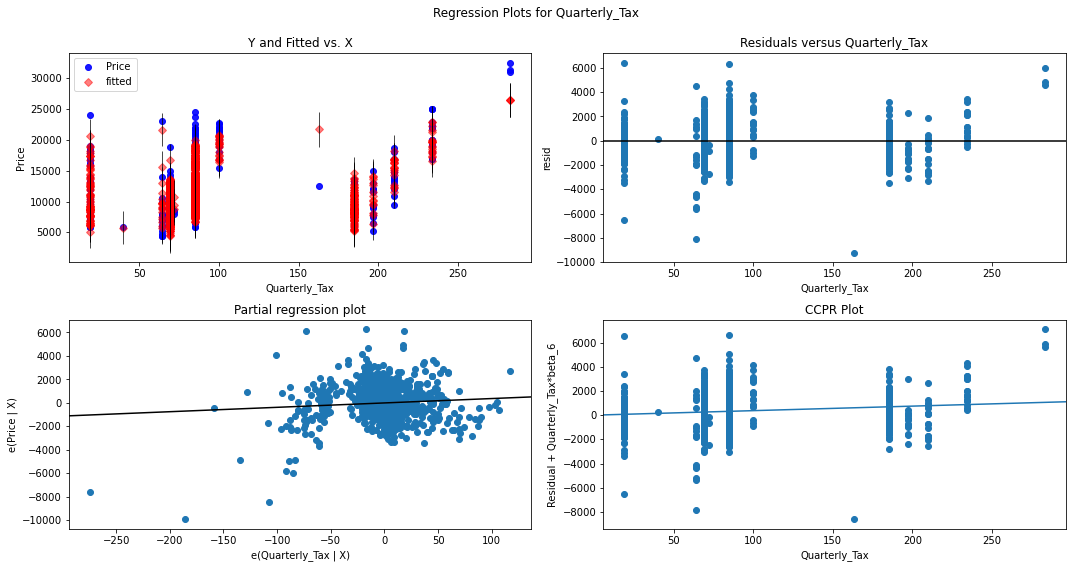

In [46]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model_without_doorcc , 'Quarterly_Tax', fig=fig)
plt.show()

### Model Detection Diagnosis:

#### Detecting Influencers/Outliers

#### Cook's Distance

In [52]:
model_influence = model_without_doorcc.get_influence()
(c, _)= model_influence.cooks_distance

In [48]:
tc_df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


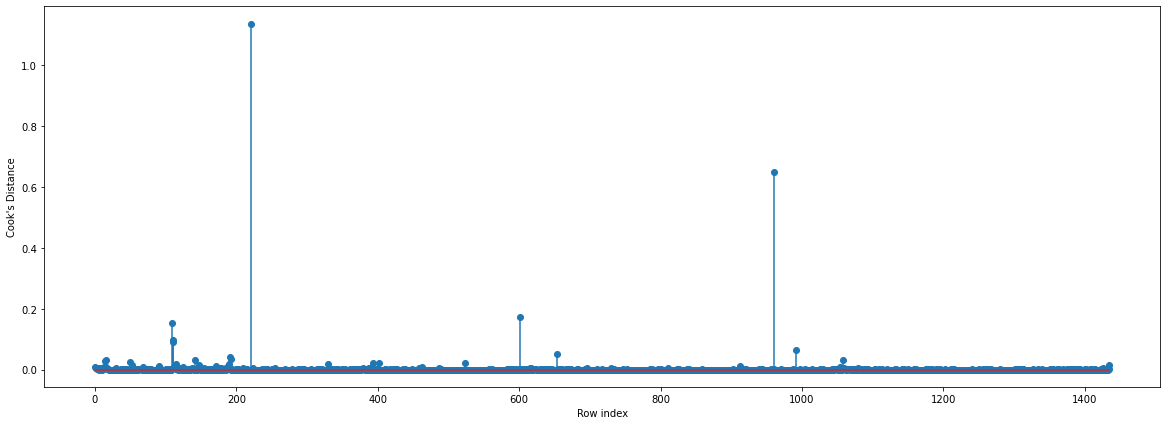

In [53]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(tc_df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [58]:
k = 8
n = 1436
print("Cook's distance should be lower than ", (3* (k+1)/n) , ",if any point is higher than this it will be a potential influence outlier")

Cook's distance should be lower than  0.018802228412256268 ,if any point is higher than this it will be a potential influence outlier


In [61]:
np.where(c > 0.018802228412256268)

(array([  14,   16,   49,  109,  110,  111,  141,  191,  192,  221,  393,
         402,  523,  601,  654,  960,  991, 1058], dtype=int64),)

## High Influence Points:

In [59]:
from statsmodels.graphics.regressionplots import influence_plot

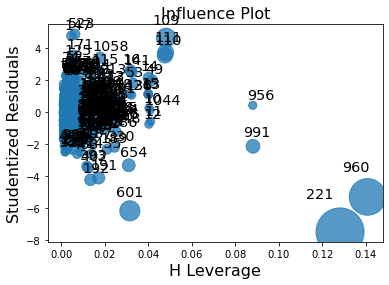

In [60]:
influence_plot(model_without_doorcc)
plt.show()

## Improving the model:

In [62]:
tc_new= pd.read_csv("tc.csv")

In [63]:
tc_new = tc_new.drop(tc_new.index[[  14,   16,   49,  109,  110,  111,  141,  191,  192,  221,  393,
         402,  523,  601,  654,  960,  991, 1058]],axis = 0).reset_index()

In [65]:
tc_new = tc_new.loc[:, ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [66]:
tc_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


In [88]:
# build the model
new_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax',data = tc_new).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1741.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:00:20   Log-Likelihood:                -12048.
No. Observations:                1418   AIC:                         2.411e+04
Df Residuals:                    1411   BIC:                         2.415e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.096e+04   1484.722     -7.380      0.000   -1.39e+04   -8045.245
Age_08_04      -116.2790      2.424    -47.965      0.000    -121.034    -111.524
KM               -0.0205      0.001    -18.069      0.000      -0.023      -0.018
HP               16.3819      2.711      6.044      0.000      11.065      21.699
Gears           518.1400    181.464      2.855      0.004     162.173     874.107
Weight           24.0000      1.181     20.321      0.000      21.683      26.317
Quarterly_Tax    -4.4749      1.293     -3.461      0.001      -7.012      -1.938
==============================================================================
Omnibus:                       30.080   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.293
Skew:                           0.174   Prob(JB):                     1.98e-11
Kurtosis:                       3.844   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
new_model.rsquared

0.8810219835746416

In [90]:
round((new_model.pvalues),3)

Intercept        0.000
Age_08_04        0.000
KM               0.000
HP               0.000
Gears            0.004
Weight           0.000
Quarterly_Tax    0.001
dtype: float64

In [91]:
new_model_influence = new_model.get_influence()
(c, _) = new_model_influence.cooks_distance

In [92]:
tc_new.shape

(1418, 9)

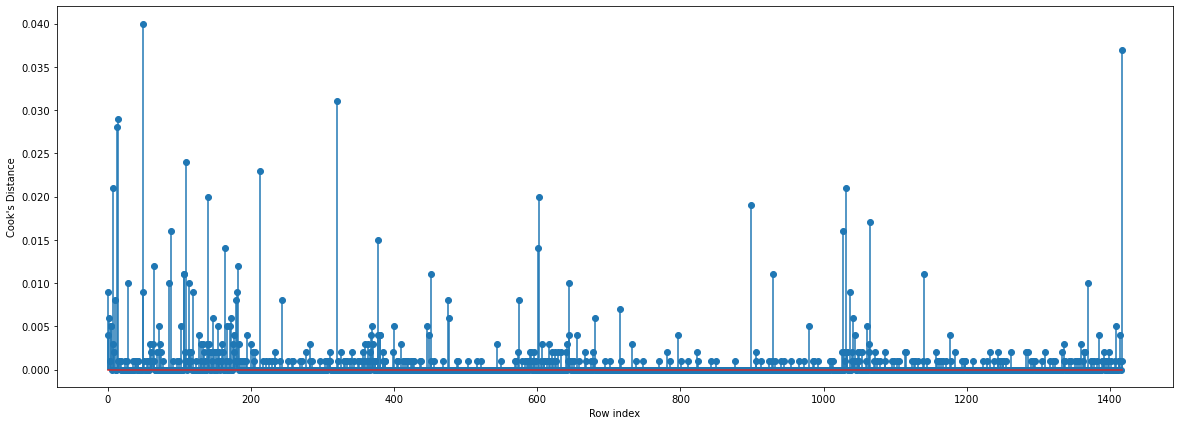

In [93]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(tc_new)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [96]:
(np.argmax(c), np.max(c))

(50, 0.040349291857603165)

In [98]:
tc_new.shape

(1418, 9)

In [99]:
k = 8
n = 1418
print("Cook's distance should be lower than ", (3* (k+1)/n) , ",if any point is higher than this it will be a potential influence outlier")

Cook's distance should be lower than  0.01904090267983075 ,if any point is higher than this it will be a potential influence outlier


In [100]:
np.where(c > 0.01904090267983075 )

(array([   8,   13,   14,   50,  109,  140,  213,  320,  603, 1031, 1417],
       dtype=int64),)

### Improving the model further

In [106]:
tc = tc_new.drop(tc_new.index[[   8,   13,   14,   50,  109,  140,  213,  320,  603, 1031, 1417]],axis = 0).reset_index()

In [107]:
tc.shape

(1407, 10)

In [115]:
final_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax', data = tc).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1755.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                -11908.
No. Observations:                1407   AIC:                         2.383e+04
Df Residuals:                    1400   BIC:                         2.387e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.169e+04   1485.580     -7.869      0.000   -1.46e+04   -8775.367
Age_08_04      -114.7511      2.361    -48.608      0.000    -119.382    -110.120
KM               -0.0203      0.001    -18.279      0.000      -0.022      -0.018
HP                9.6738      2.801      3.454      0.001       4.179      15.168
Gears           563.1583    180.312      3.123      0.002     209.447     916.870
Weight           25.2015      1.175     21.452      0.000      22.897      27.506
Quarterly_Tax    -6.8652      1.294     -5.306      0.000      -9.403      -4.327
==============================================================================
Omnibus:                       11.946   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.726
Skew:                           0.099   Prob(JB):                     0.000385
Kurtosis:                       3.479   Cond. No.                     3.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
final_model.rsquared - new_model.rsquared

0.0016472301917124232

### We see there is not much of a difference with the accuracy after deleting the influence points/outliers

#### <center> ===============The model predicted the price with the accuracy of 88% =====================